# Importera Hemnet data

In [100]:
import re

with open('hemnet.txt') as f:
    lines = f.readlines()

size = []
cost = []
room_size = []
house_cost = []

for i in range(0, len(lines)):
    if '<div class="sold-property-listing__subheading sold-property-listing__area">' in lines[i]:
        if (i+1) < len(lines):
            tmp = re.search(r'\d+', lines[i+1])
            if (tmp is None):
                None
            else:
                slask = tmp.group()
            size.append(slask)
            
    if 'Slutpris' in lines[i] and len(lines[i]) < 50:
        rmv = lines[i]
        rmv = rmv.replace(" ","")
        
        tmp = re.search(r'\d+', rmv)
        if (tmp is None):
            None
        else:            
            slask = tmp.group()
        cost.append(slask)

for i in range(0, len(size)): # Removes house without value
    if int(size[i]) < 1000:
        room_size.append(size[i])
        house_cost.append(cost[i])

# Convert and reshape for use in sklearn
room_size = np.asarray(room_size).astype(np.float64)
house_cost = np.asarray(house_cost).astype(np.float64)
room_size = np.asarray(room_size).reshape(-1, 1)

## Del 1: 

Slope: 15431.967358524042 
Intercept: 3296194.784459818 

100 m^2: 4.84 miljoner kr.
150 m^2: 5.61 miljoner kr.
200 m^2: 6.38 miljoner kr.


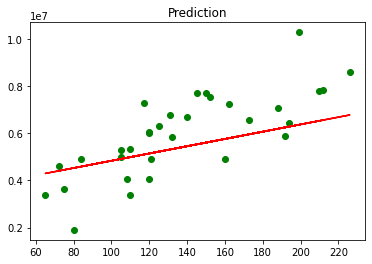

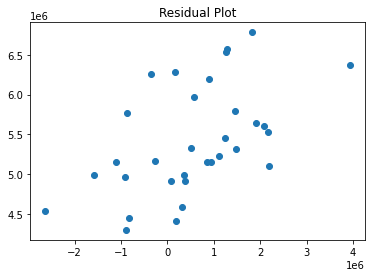

In [109]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import numpy as np

Xh_train, Xh_test, yh_train, yh_test = train_test_split(room_size, house_cost, test_size = 0.90, random_state = 12)

lin_rg = linear_model.LinearRegression()
lin_rg.fit(Xh_train, yh_train)

yh_pred = lin_rg.predict(Xh_test)

slope = lin_rg.coef_
intercept = lin_rg.intercept_
print("Slope:", slope[0], "\nIntercept:", intercept, "\n")

plt.scatter(Xh_test, yh_test, color="green")
plt.title("Prediction")
plt.plot(Xh_test, yh_pred, color="red")

print("100 m^2:", round(lin_rg.predict(np.array([100]).reshape(1, -1))[0] / 1000000, 2), "miljoner kr.") 
print("150 m^2:", round(lin_rg.predict(np.array([150]).reshape(1, -1))[0] / 1000000, 2), "miljoner kr.")
print("200 m^2:", round(lin_rg.predict(np.array([200]).reshape(1, -1))[0] / 1000000, 2), "miljoner kr.")

plt.show()

plt.scatter(yh_test-yh_pred,yh_pred)
plt.title("Residual Plot")
plt.show()

# Del 2

In [112]:
iris = datasets.load_iris()

# Split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

def Linear_Regression():
    
    lr = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class='ovr')
    lr.fit(X_train, y_train)
    
    predictions = lr.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    
    print("LRG: \n", confusion_matrix(y_test, predictions))
    
    return accuracy

def Knn(k, dst):
    
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights=dst)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    
    print("KNN: \n", confusion_matrix(y_test, predictions))
    
    return accuracy # predictions, accuracy

for i in range(1, 100):
    print("Distance: ", Knn(i,'distance'))
    print("Uniform:  ", Knn(i,'uniform'))
    print("test")

print("KNN: ", Knn(3, 'uniform'), "\n")
print("LRG: ", Linear_Regression())

    

KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Uniform:   0.9777777777777777
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Uniform:   0.9777777777777777
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Uniform:   0.9777777777777777
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Uniform:   0.9777777777777777
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Uniform:   0.9777777777777777
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0 14  0]
 [ 0  0 11]]
Uniform:   1.0
test
KNN: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Distance:  0.9777777777777777
KNN: 
 [[20  0  0]
 [ 0